# Heart Failure Prediction

By: Savi R Bhide 

## Preamble: 
Cardiovascular diseases is one of those diseases which causes most of the deaths.<br>
Some of the major contributing factors of the heart failure are anemia, daibetes, high blood pressure, smoking, etc. All these factors when goes beyond their safe limit causes cardiovascular diseases. <br>
<br>
This project has all these attributes, so let's have a look how different factors effects heart failure.

## Data Understanding:
Importing pandas for data analysis and manipulations.<br>
Importing numpy for array processing and manipulations.<br>
Importing matplotlib for plotting various plots and graphs to understand data.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Data source : Kaggle <br>
Data set name : Heart failure clinical records. <br>
Data source URL: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data <br>
Reading data from csv file.

In [2]:
df = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")

### Data physical characteristics:
Recognition of various physical characteristics of data, like shape, size, columns, rows, etc. 

In [3]:
df.shape
rows = len(df.axes[0])
cols = len(df.axes[1])
print(df.shape,rows,cols)

(299, 13) 299 13


In [4]:
df.size

3887

In [5]:
df.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data attributes details:

In [6]:
df.columns

Index(['age', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Here in original dataset two attributes are named incorrectly, so renaming them.

In [7]:
df.rename(columns = {'creatinine_phosphokinase':'creatine_phosphokinase','serum_creatinine':'serum_creatine'},inplace = True)

In [8]:
df.dtypes.value_counts()

int64      10
float64     3
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     299 non-null    float64
 1   anemia                  299 non-null    int64  
 2   creatine_phosphokinase  299 non-null    int64  
 3   diabetes                299 non-null    int64  
 4   ejection_fraction       299 non-null    int64  
 5   high_blood_pressure     299 non-null    int64  
 6   platelets               299 non-null    float64
 7   serum_creatine          299 non-null    float64
 8   serum_sodium            299 non-null    int64  
 9   sex                     299 non-null    int64  
 10  smoking                 299 non-null    int64  
 11  time                    299 non-null    int64  
 12  DEATH_EVENT             299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data Preparation
### Data wrangling
Means converting raw data into some table or charts which is useful to extract some good information from it.<br>

In [10]:
df.describe()

,age,anemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
df.dtypes

age                       float64
anemia                      int64
creatine_phosphokinase      int64
diabetes                    int64
ejection_fraction           int64
high_blood_pressure         int64
platelets                 float64
serum_creatine            float64
serum_sodium                int64
sex                         int64
smoking                     int64
time                        int64
DEATH_EVENT                 int64
dtype: object

<b>Data cleaning:</b>
For that, first check the missing values in the dataset. <br>
If missing values are present, than clean it using various methods like replace missing values by mean, mode, median, or any combination according to situation.<br>
Like; <br>
If value is continuous, then replace it by mean or median.<br>
If value is discreate, then replace it by mode.

In [12]:
df.isnull().sum()

age                       0
anemia                    0
creatine_phosphokinase    0
diabetes                  0
ejection_fraction         0
high_blood_pressure       0
platelets                 0
serum_creatine            0
serum_sodium              0
sex                       0
smoking                   0
time                      0
DEATH_EVENT               0
dtype: int64

Since there is no missing values. So we can move forward for visualization of data.

## Data Visualization: 
#### Visualization of data using some Pie charts  :
In all pie charts informations are depicted as follows:
<table >
  <tr>
    <th>Label</th>
    <th>Attribute</th>
    <th>Death event</th>
  </tr>
  <tr>
    <td>0</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>1</td>
    <td>False</td>
    <td>True</td>
  </tr>
    <tr>
    <td>2</td>
    <td>True</td>
    <td>False</td>
  </tr>
  <tr>
    <td>3</td>
    <td>True</td>
    <td>True</td>
  </tr>
</table>

,anemia,DEATH_EVENT,count
0,0,0,40.133779
1,0,1,16.722408
2,1,0,27.759197
3,1,1,15.384615


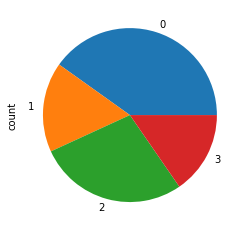

In [13]:
dc_anemia = df.groupby(['anemia','DEATH_EVENT']).size().reset_index().rename(columns={0:'count'})
dc_anemia['count'] = dc_anemia['count']*100/rows
dc_anemia['count'].plot.pie()
dc_anemia

,diabetes,DEATH_EVENT,count
0,0,0,39.464883
1,0,1,18.729097
2,1,0,28.428094
3,1,1,13.377926


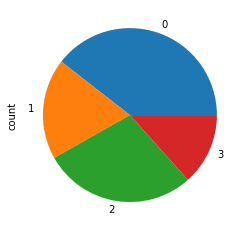

In [14]:
dc_diabetes  = df.groupby(['diabetes','DEATH_EVENT']).size().reset_index().rename(columns={0:'count'})
dc_diabetes['count'] = dc_diabetes['count']*100/rows
dc_diabetes['count'].plot.pie()
dc_diabetes 

,smoking,DEATH_EVENT,count
0,0,0,45.819398
1,0,1,22.073579
2,1,0,22.073579
3,1,1,10.033445


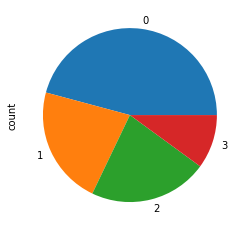

In [15]:
dc_smoking  = df.groupby(['smoking','DEATH_EVENT']).size().reset_index().rename(columns={0:'count'})
dc_smoking['count'] = dc_smoking['count']*100/rows
dc_smoking['count'].plot.pie()
dc_smoking 

,high_blood_pressure,DEATH_EVENT,count
0,0,0,45.819398
1,0,1,19.063545
2,1,0,22.073579
3,1,1,13.043478


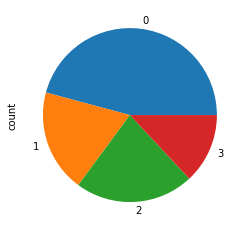

In [16]:
dc_high_blood_pressure  = df.groupby(['high_blood_pressure','DEATH_EVENT']).size().reset_index().rename(columns={0:'count'})
dc_high_blood_pressure['count'] = dc_high_blood_pressure['count']*100/rows
dc_high_blood_pressure['count'].plot.pie()
dc_high_blood_pressure 

In the following;<br>
<table>
  <tr>
    <th>Sex</th>
    <th>Label</th>
  </tr>
  <tr>
    <td>Female</td>
      <td>0</td>
  </tr>
  <tr>
    <td>Male</td>
    <td>1</td>
  </tr>
</table>

,sex,DEATH_EVENT,count
0,0,0,23.745819
1,0,1,11.371237
2,1,0,44.147157
3,1,1,20.735786


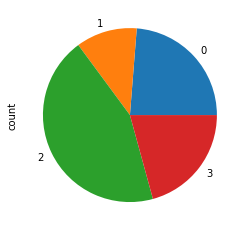

In [17]:
dc_sex = df.groupby(['sex','DEATH_EVENT']).size().reset_index().rename(columns={0:'count'})
dc_sex['count'] = dc_sex['count']*100/rows
dc_sex['count'].plot.pie()
dc_sex

#### Visualisation of data using histrogram :


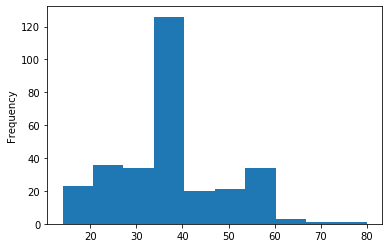

In [18]:
df['ejection_fraction'].plot(kind = 'hist')

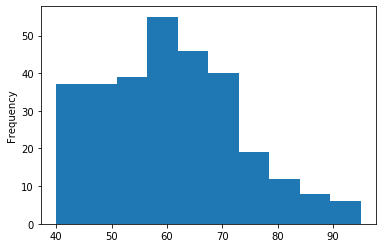

In [19]:
df['age'].plot(kind = 'hist')

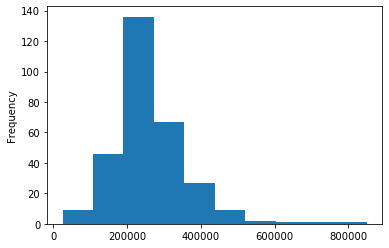

In [20]:
df['platelets'].plot(kind = 'hist')

#### Visualization of data using Boxplot:
Boxplot method for graphically depicting groups of numerical data through their quartiles.
<br>So it is basically used to check the outliers of data.

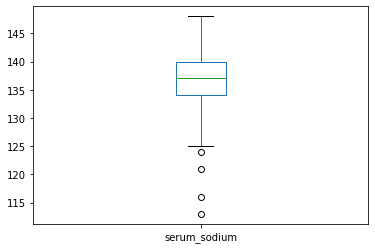

In [21]:
df['serum_sodium'].plot(kind = 'box')

In [22]:
dfss = df[df['serum_sodium']<125]
dfss[['serum_sodium','DEATH_EVENT']]

,serum_sodium,DEATH_EVENT
4,116,1
19,121,1
126,124,1
199,113,0


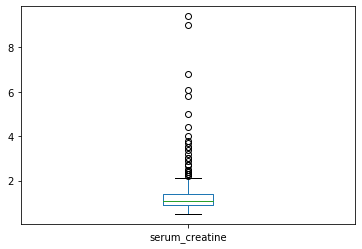

In [23]:
df['serum_creatine'].plot(kind = 'box')

In [24]:
dfsc = df[df['serum_creatine']>=6]
dfsc[['serum_creatine','DEATH_EVENT']]

,serum_creatine,DEATH_EVENT
9,9.4,1
52,6.8,1
131,6.1,0
217,9.0,1


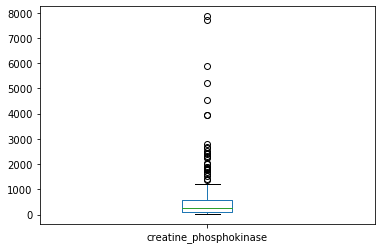

In [25]:
df['creatine_phosphokinase'].plot(kind = 'box')

In [26]:
dfcp = df[df['creatine_phosphokinase']>=4000]
dfcp[['creatine_phosphokinase','DEATH_EVENT']]

,creatine_phosphokinase,DEATH_EVENT
1,7861,1
60,7702,1
72,5882,1
103,5209,0
134,4540,0


After checking all these outliers, conculsion is that these are the person who have more chances of heart failure than that of others. So we have to keep all these outliers within the data.

## Data modeling:
Now we will split data for training and testing using train_test_split.

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
Y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis = 1)

In [29]:
Xtrain, Xtest, Ytrain, Ytest = tts(X,Y,test_size = 0.25,shuffle=False)

### Logistic regression: 
Fitting data using Logistic regression model as output data is categorical in nature. 
Solver used is liblinear as it runs good with small data. 

In [30]:
from sklearn.linear_model import LogisticRegression as LogR
categorical = LogR(solver = 'liblinear').fit(Xtrain, Ytrain)
YPre = categorical.predict(Xtest)

In [31]:
categorical.score(Xtest,Ytest)*100

94.66666666666667

### Linear regression:
Fitting data using linear regression model. After that making predictions, but as we know linear regression gives continuos data output, so we have to use some threshold value to make it categocial data as our final desired output is whether person will face heart failure or not.

In [32]:
from sklearn.linear_model import LinearRegression as LR

In [33]:
lr = LR()
lr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
YPred = abs(lr.predict(Xtest))
YPred

array([0.04616949, 0.09117484, 0.12576134, 0.00661251, 0.64250117,
       0.30833737, 0.30255799, 0.08586032, 0.21214251, 0.09557996,
       0.19588865, 0.10976609, 0.1563524 , 0.16077104, 0.08009304,
       0.18396743, 0.10646222, 0.11595762, 0.1804501 , 0.07756041,
       0.00344861, 0.03738249, 0.0611442 , 0.22888547, 0.23226682,
       0.04560393, 0.00356026, 0.01122784, 0.2149134 , 0.1950865 ,
       0.40035534, 0.11671633, 0.08706833, 0.15160485, 0.11033715,
       0.34477857, 0.20524617, 0.05424399, 0.1346485 , 0.23248517,
       0.10707815, 0.27618436, 0.10717609, 0.14051608, 0.19663971,
       0.22541523, 0.0863971 , 0.11398881, 0.02715712, 0.38228568,
       0.07272814, 0.23983596, 0.0021925 , 0.04794788, 0.06041132,
       0.10611996, 0.03891509, 0.07017799, 0.07761594, 0.11855588,
       0.37041723, 0.23837011, 0.12971969, 0.37505595, 0.03377311,
       0.01027686, 0.41790023, 0.14681217, 0.31227405, 0.19804202,
       0.2556425 , 0.15462225, 0.57641144, 0.30869877, 0.42973

In [35]:
for i in range(len(YPred)):
    if YPred[i] <= 0.5:
        YPred[i] = 0
    else:
        YPred[i] = 1
YPred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0.])

In [36]:
from sklearn.metrics import accuracy_score as acc
acc(Ytest,YPred)*100

92.0

So after passing dataset through these two models.
### Accuracy score:
<br>Linear regression model <b> 92.0% </b>
<br>Logistic regression model <b> 94.67% </b>

## Conclusion: 
1. After going through various visualizations, conclusions are as follows:
<br> Boxplot can be used to detect what level of causes more chances of heart failure.
<br> Pie chart gives information regrading how the anemia, diabetes, high_blood_pressure, smoking, etc effects the heart failure.
2. After using both kind of models, Logistic regression proved itself to be better model than that of linear regression. When output is of categorical form.<br>


## Uses of the project:
Can be used to detect how much a person has chances of heart failure. <br>
Due to hypertension, diabetes, lack of blood platelets, smoking, etc.
